<a href="https://colab.research.google.com/github/juan19932carlos/Notebooks/blob/master/misc/generate-video-from-images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
import os, datetime, subprocess, re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from ipywidgets import IntProgress
from IPython.display import display

In [3]:
folder = 'drive/MyDrive/auto-fotos'
file = '003634b0-9eff-4ca6-88f3-bcaad9662840.jpg'

In [91]:
ls_output = subprocess.check_output([f'ls', '-l', folder])
regex = re.compile(r"(Jun \d{2} \d{2}:\d{2}) (.+)")

lines = pd.Series(ls_output.decode('utf-8').split('\n'))
lines = lines[lines.str.contains('jpg')]
files = lines.apply(lambda s: pd.Series(regex.findall(s)[0]))
files.columns = ['date', 'file_name']
files.sample(5)

,date,file_name
762,Jun 14 18:43,8238d7a5-53a3-4750-b29b-9742400be066.jpg
810,Jun 15 02:46,89f78cba-3b13-4683-a3e3-0c646bc364da.jpg
1101,Jun 15 11:44,c0d0a581-8437-4338-a4e7-5d9eefd85ecd.jpg
311,Jun 15 00:02,370cb2f8-fff5-4412-a63b-b46024183760.jpg
1034,Jun 14 18:59,b5233572-a5e1-431a-8aeb-02d4cc0040d3.jpg


In [94]:
files['datetime'] = pd.to_datetime(files['date'], format='%b %d %H:%M')
files = files.sort_values('datetime', ascending=True)
files.head()

,date,file_name,datetime
1402,Jun 14 18:18,f16e0f5e-3904-467b-83fb-08fe1c122235.jpg,1900-06-14 18:18:00
903,Jun 14 18:18,9bd62b05-afa7-4f94-ba90-4e7930ee2121.jpg,1900-06-14 18:18:00
592,Jun 14 18:19,635b80aa-d75d-4cfc-aa56-63de7f9f8938.jpg,1900-06-14 18:19:00
955,Jun 14 18:20,a67b0e14-a6ef-4c90-a427-3e84e7689bb6.jpg,1900-06-14 18:20:00
524,Jun 14 18:21,574d19db-49bd-495e-bff3-53d546befa8a.jpg,1900-06-14 18:21:00


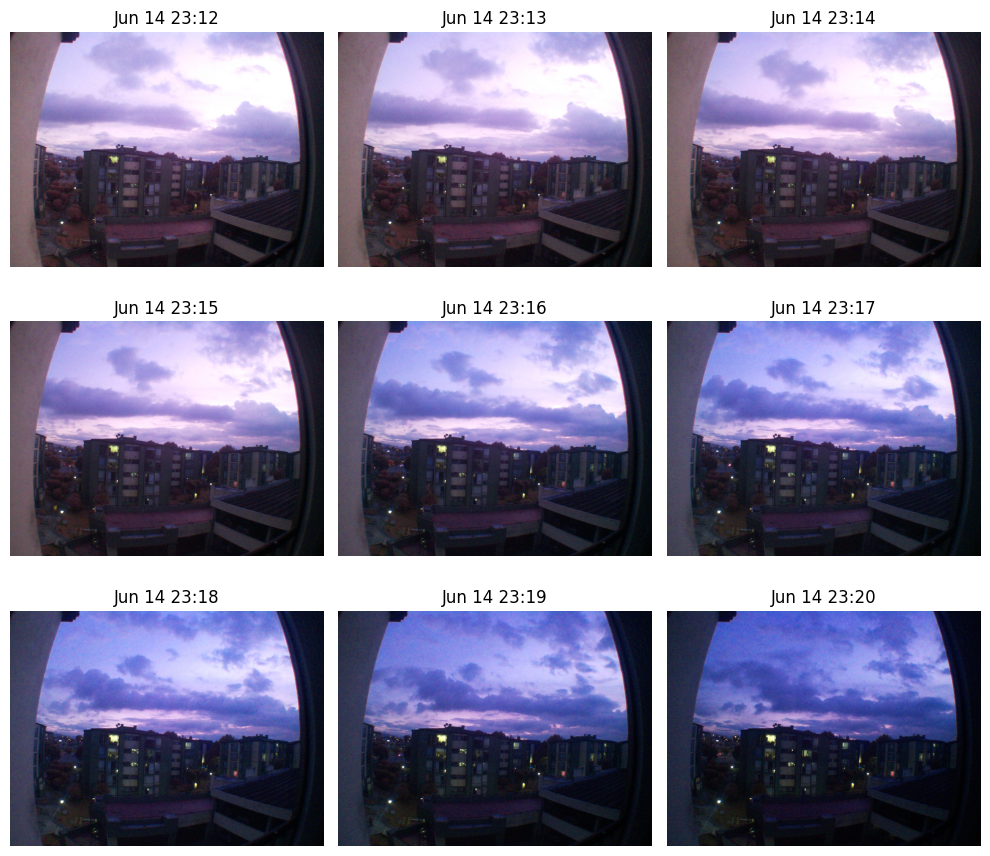

In [119]:
steps = np.arange(0, 11, 1)
file_sample = files.iloc[steps + 295]

fig, axes = plt.subplots(3, 3, figsize=(10, 9))

for ( date, file_name, a ), ax in zip(file_sample.to_numpy(), axes.flat):
  img = mpimg.imread(os.path.join(folder, file_name))
  ax.set_title(date)
  ax.imshow(img)
  ax.axis('off')
plt.tight_layout()
plt.show()

In [118]:
first_image_path = os.path.join(folder, files.iloc[0]['file_name'])
first_image = cv2.imread(first_image_path)
display(first_image.shape)
frame_width = first_image.shape[1]
frame_height = first_image.shape[0]

(1944, 2592, 3)

In [125]:
len(files)

1477

In [127]:
# Progress bar
progress = IntProgress(min=0, max=len(files))
display(progress)

# Define video writer (adjust FPS and codec as needed)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Adjust codec if needed (e.g., 'MJPG')
video = cv2.VideoWriter('drive/MyDrive/output.mp4', fourcc, 10, (frame_width, frame_height))  # Adjust FPS

# Process each image and write to video
for image_path in files['file_name']:
  image = cv2.imread(os.path.join(folder, image_path))
  video.write(image)
  progress.value += 1

# Release video writer
video.release()

IntProgress(value=0, max=1477)